In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
# Read file CSV 
file_path = 'C:/Users/Admin/Desktop/fraud_detection_project/data/processed/clean_credit_card_transactions.csv'
df = pd.read_csv(file_path)

In [27]:
# Overview of data
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_zipcode,age,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,trans_day_of_week,age_group
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,28705.0,31,2019,1,1,0,0,18,Tuesday,Aged 29-39
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Unknown,41,2019,1,1,0,0,44,Tuesday,Aged 39-49
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,83236.0,57,2019,1,1,0,0,51,Tuesday,Aged 49-59
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Unknown,52,2019,1,1,0,1,16,Tuesday,Aged 49-59
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,22844.0,33,2019,1,1,0,3,6,Tuesday,Aged 29-39


In [28]:
# Check unique value of category columns
df["category"].nunique()

14

In [29]:
# Check all unique value of category columns
df["category"].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

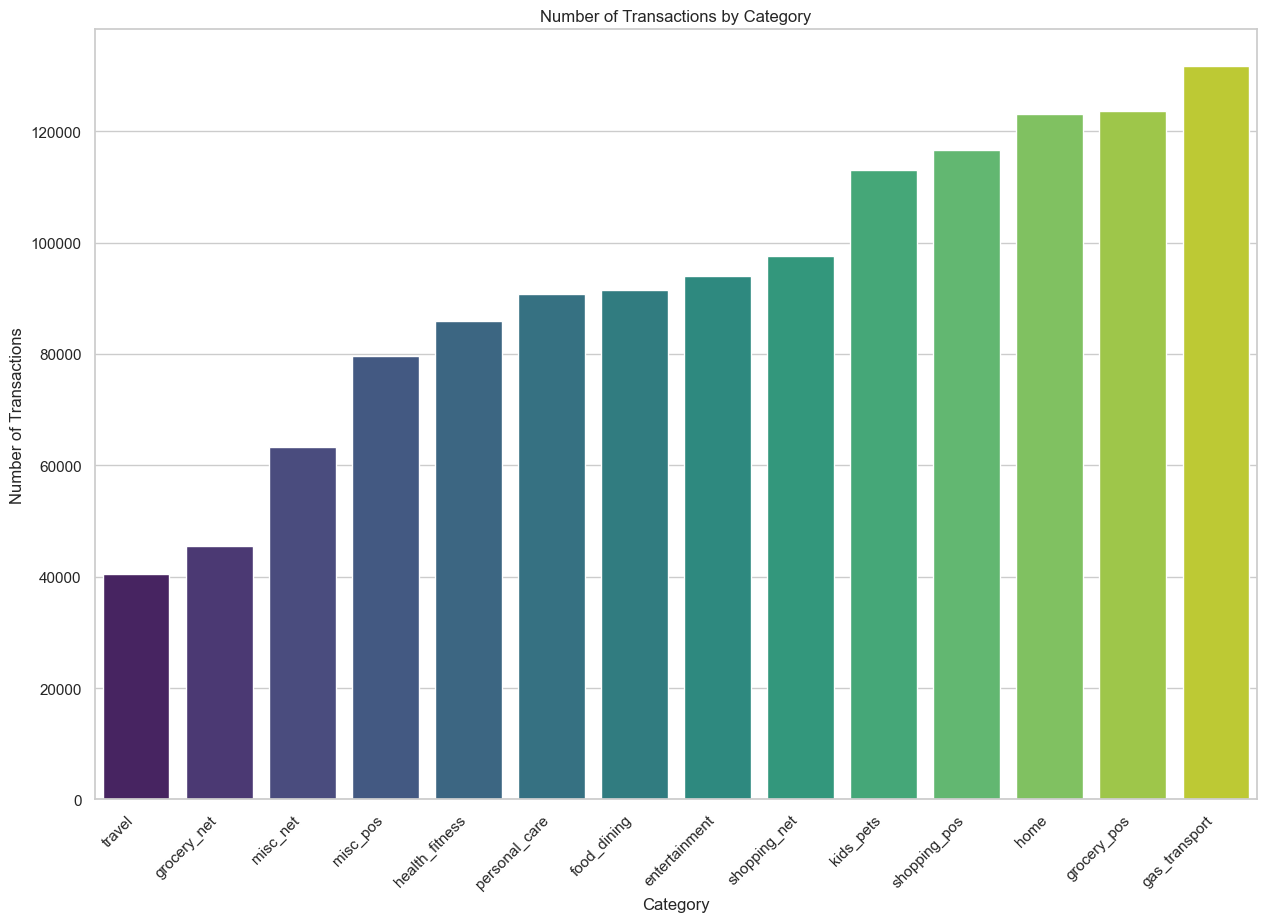

In [30]:
# Analyze according to category
# 1. Which category have most transaction ?

# Group by 'category' and count the transaction
category_counts = df.groupby("category").size().reset_index(name='counts')
category_counts = category_counts.sort_values(by="counts",ascending=True)

# Setup for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(data=category_counts, x='category', y='counts', hue = 'category',  order=category_counts['category'], palette='viridis')

# Set labels and title
plt.title('Number of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\category\number_of_transactions_by_category.png"
plt.savefig(image_path)

# Display the plot
plt.show()

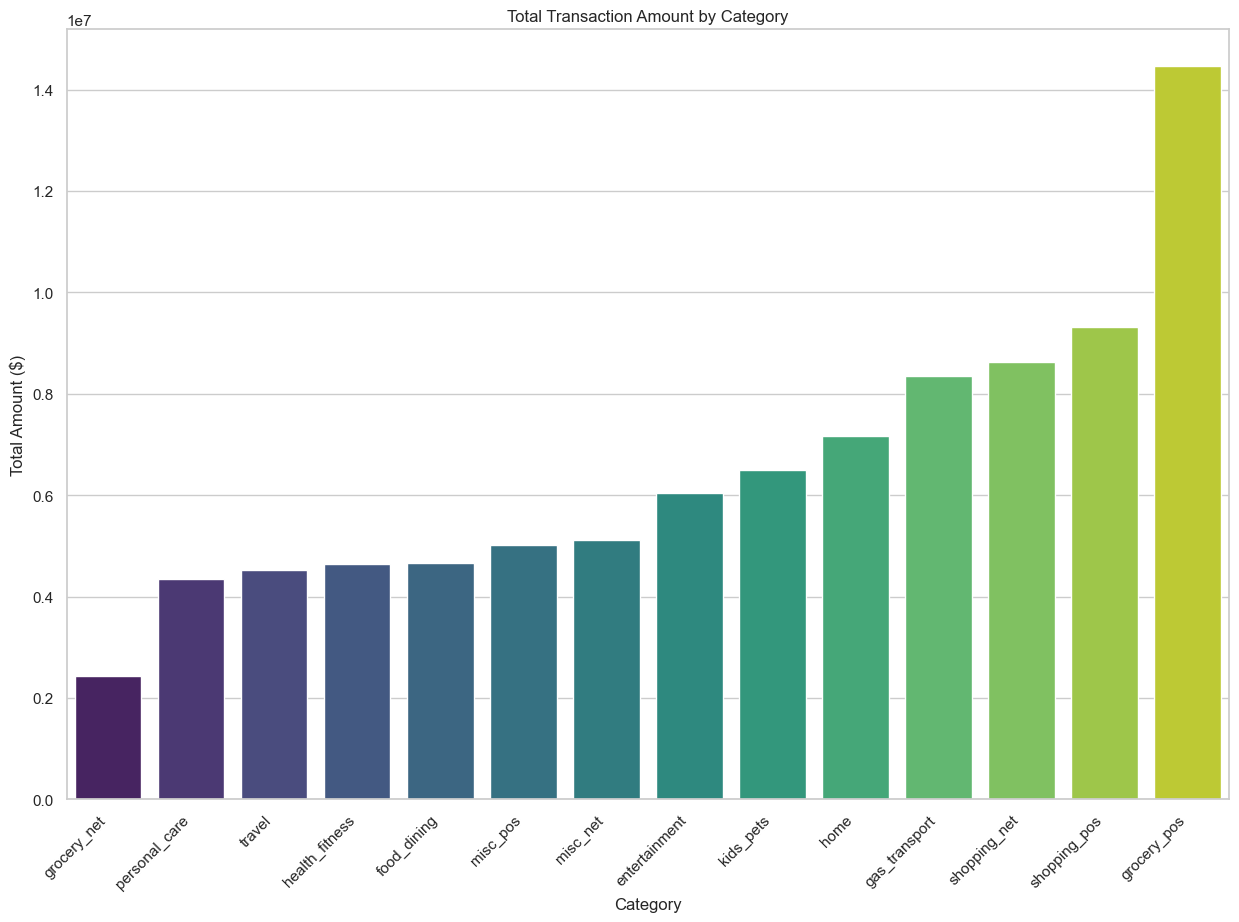

In [31]:
# 2. Which category have most amout of money ?

# Group by 'category' and sum the 'amt' for each category
category_amount = df.groupby("category")["amt"].sum().reset_index()
category_amount = category_amount.sort_values(by="amt",ascending=True)

# Setup for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(data=category_amount, x='category', y='amt',hue='category', order=category_amount["category"], palette='viridis')

# Set labels and title
plt.title('Total Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\category\total_transaction_amount_by_category.png"
plt.savefig(image_path)

# Display the plot
plt.show()

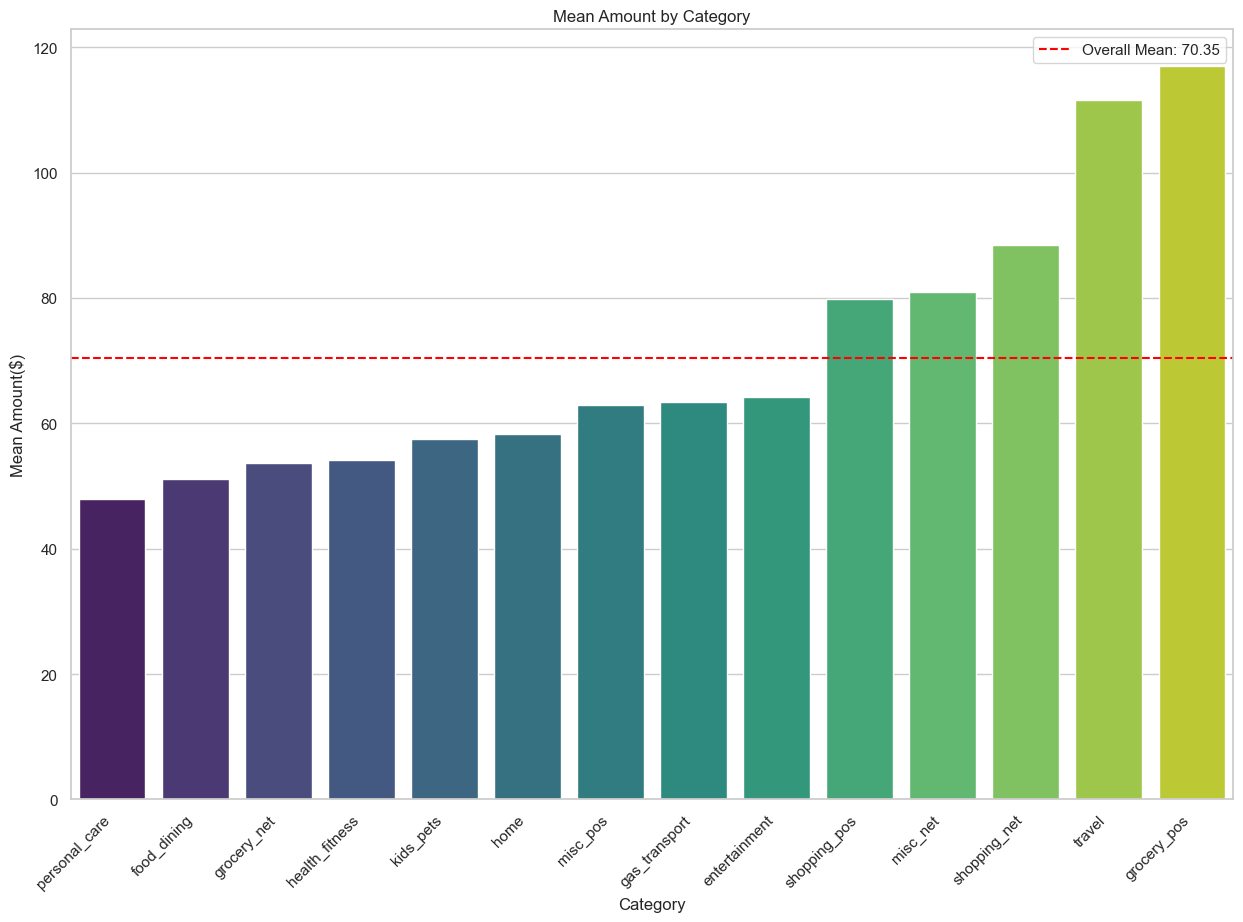

In [32]:
# 3. Mean of each category ?

# Group by 'category' and mean the 'amt' for each category
category_amount_mean = df.groupby("category")["amt"].mean().reset_index()
category_amount_mean = category_amount_mean.sort_values(by="amt",ascending=True)
overall_mean = df["amt"].mean()

# Setup for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(data=category_amount_mean, x='category', y='amt',hue='category', order=category_amount_mean["category"], palette='viridis')

# Set labels and title
plt.title('Mean Amount by Category')
plt.xlabel('Category')
plt.ylabel('Mean Amount($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add a horizontal line at the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')

# Add a legend for the horizontal line
plt.legend()

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\category\mean_amount_by_category.png"
plt.savefig(image_path)

# Display the plot
plt.show()

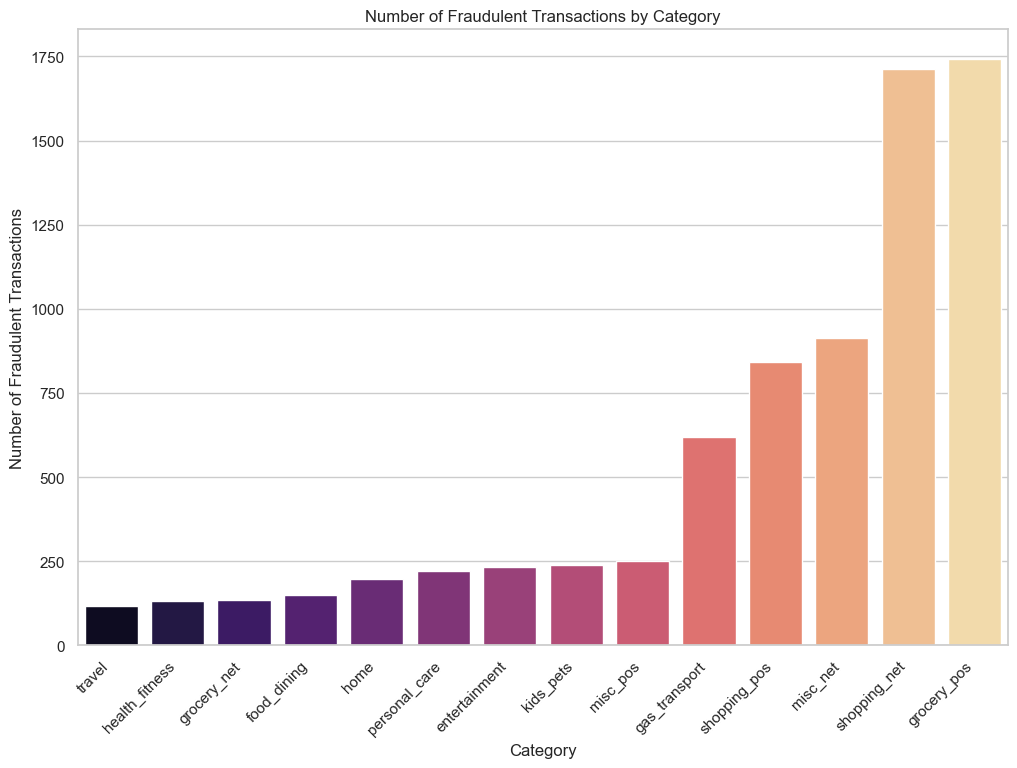

In [33]:
# 4. Which category have most fraud tranactions ?

# Filter Fraud Transaction
fraud_transaction = df[df["is_fraud"] == 1]

# Group by category
fraud_counts = fraud_transaction.groupby("category").size().reset_index(name="counts")
fraud_counts = fraud_counts.sort_values(by="counts",ascending=True)
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the count of fraudulent transactions by category
plt.figure(figsize=(12, 8))
sns.barplot(data = fraud_counts, x="category", y="counts", hue='category', order=fraud_counts["category"], palette="magma")
plt.title('Number of Fraudulent Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\category\number_of_fraudulent_transactions_by_category.png"
plt.savefig(image_path)

# Show the plot
plt.show()